In [1]:
import pandas as pd
file_name = "./insurance.csv"
insurance = pd.read_csv(file_name)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [3]:
print("Rows : ", insurance.shape[0])
print("Columns : ",insurance.shape[1] )
print("Feature :" , insurance.columns.tolist())
print("Missing Values ", insurance.isnull().sum().values.sum())
print("Unique Values ", insurance.nunique())

Rows :  1338
Columns :  7
Feature : ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Missing Values  0
Unique Values  age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [4]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [5]:
import matplotlib.pyplot as plt

def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)) , corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(insurance)

No handles with labels found to put in legend.


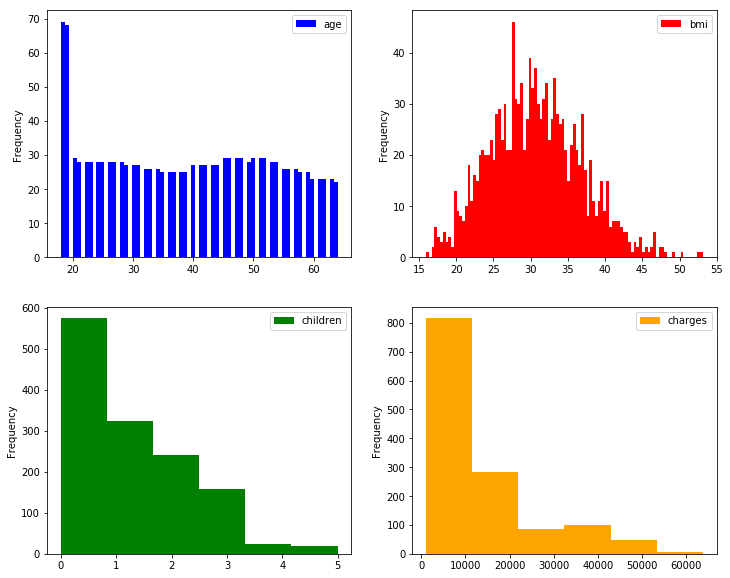

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
insurance.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
insurance.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
insurance.plot(kind="hist", y="children", bins=6, color="g", ax=axes[1][0])
insurance.plot(kind="hist", y="charges", bins=6, color="orange", ax=axes[1][1])
plt.show()

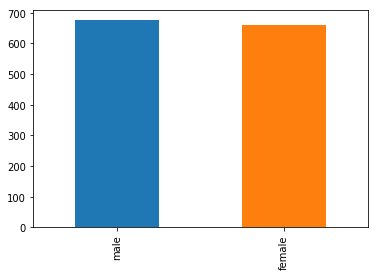

In [7]:
insurance['sex'].value_counts().plot(kind='bar')

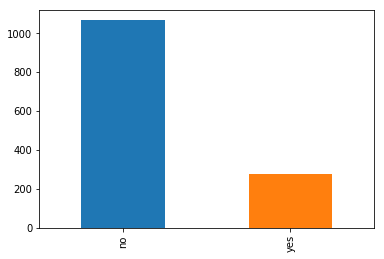

In [8]:
insurance['smoker'].value_counts().plot(kind='bar')

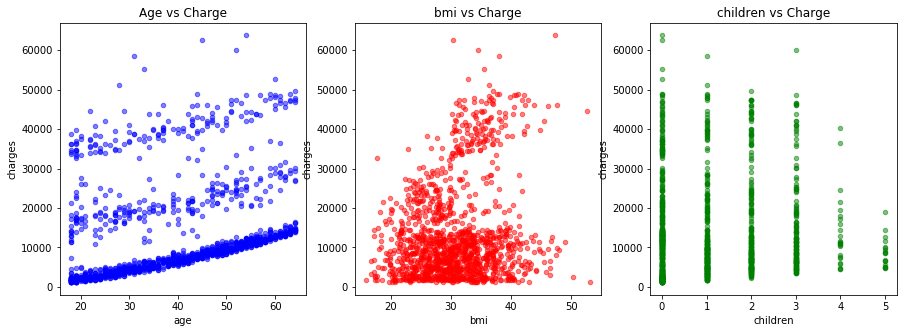

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
insurance.plot(kind="scatter", x="age", y="charges" , alpha=0.5, color="b", ax=axes[0] , title="Age vs Charge")
insurance.plot(kind="scatter", x="bmi", y="charges" ,alpha=0.5, color="r", ax=axes[1], title="bmi vs Charge")
insurance.plot(kind="scatter", x="children", y="charges" , alpha=0.5, color="g", ax=axes[2], title="children vs Charge")

plt.show()

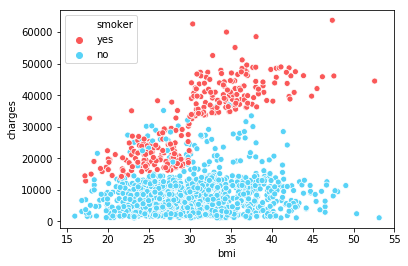

In [10]:
import seaborn as sns
pal = ['#FA5858', '#58D3F7']
sns.scatterplot(x="bmi",y="charges",data=insurance, palette=pal, hue="smoker")


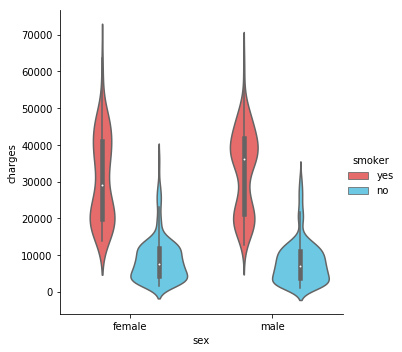

In [11]:
pal = ['#FA5858', '#58D3F7']
sns.catplot(x="sex", y="charges", hue="smoker", kind="violin", data=insurance, palette=pal )

Text(0.5, 1.0, 'Smoker')

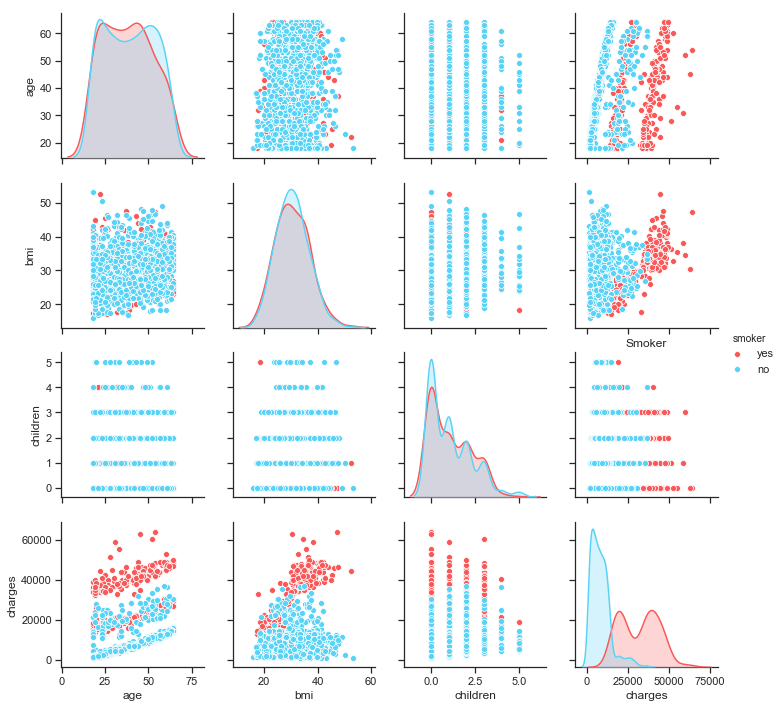

In [12]:
sns.set(style="ticks")
pal = ['#FA5858', '#58D3F7']
sns.pairplot(insurance,hue="smoker", palette=pal)
plt.title("Smoker")

In [13]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
insurance.drop(['region'],axis=1, inplace=True)
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [15]:
insurance['sex'] = insurance['sex'].map(lambda s :1 if s == 'female' else 0)
insurance['smoker'] = insurance['smoker'].map(lambda s :1 if s == 'yes' else 0)
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [16]:
X = insurance.drop(['charges'], axis=1)
y = insurance.charges

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(lr.score(X_test, y_test))

0.7952171980481992


In [18]:
X_train.head()

,age,sex,bmi,children,smoker
1075,32,1,29.59,1,0
131,61,1,22.04,0,0
15,19,0,24.60,1,0
1223,20,1,24.42,0,1
1137,26,1,22.23,0,0


In [19]:
results = pd.DataFrame({'Actual' : y_test , 'predicted': y_test_pred})
results

,Actual,predicted
578,9724.53000,11457.247488
610,8547.69130,9925.930740
569,45702.02235,37768.549419
1034,12950.07120,15853.346790
198,9644.25250,6939.119725
981,4500.33925,3715.158091
31,2198.18985,1226.517979
1256,11436.73815,14013.625319
1219,7537.16390,8801.377937
1320,5425.02335,7319.356930


In [20]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

c:\program files\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\program files\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [21]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.514853,0.985155,-0.181331,-0.063607,-0.503736
1,1.548746,0.985155,-1.393130,-0.892144,-0.503736
2,-1.439915,-1.015069,-0.982242,-0.063607,-0.503736
3,-1.368757,0.985155,-1.011133,-0.892144,1.985167
4,-0.941805,0.985155,-1.362635,-0.892144,-0.503736


In [22]:
pd.DataFrame(y_train).head()

,charges
1075,4562.84210
131,13616.35860
15,1837.23700
1223,26125.67477
1137,3176.28770


In [23]:
from sklearn.linear_model import LinearRegression
multi_linear_regression = LinearRegression(fit_intercept=False)
multi_linear_regression.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_feature = PolynomialFeatures(degree=3)
x_train_poly = polynomial_feature.fit_transform(X_train)
x_test_poly = polynomial_feature.fit_transform(X_test)
polynomial_reg = LinearRegression(fit_intercept=False)
polynomial_reg.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [25]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=13, splitter='best')

In [26]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=13, verbose=0, warm_start=False)

In [27]:
from sklearn.svm import SVR
support_vector_reg = SVR(gamma="auto", kernel="linear", C=100)
support_vector_reg.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [29]:
#Eval Liner regression 
y_pred_MLR_train = multi_linear_regression.predict(X_train)
y_pred_MLR_test = multi_linear_regression.predict(X_test)
accuracy_MLR_train = r2_score(y_train,y_pred_MLR_train)
print("Training Accuracy for Multiple Regression model", accuracy_MLR_train)

Training Accuracy for Multiple Regression model -0.4895607457643889


In [30]:
accuracy_MLR_test =  r2_score(y_test,y_pred_MLR_test)
print("Testing Accuracy for Multiple Regression model", accuracy_MLR_train)

Testing Accuracy for Multiple Regression model -0.4895607457643889


In [31]:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE Training data ", RMSE_MLR_train)

RMSE Training data  14589.30728329809


In [32]:
RMSE_MLR_test = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE Test data ", RMSE_MLR_test)

RMSE Test data  14589.30728329809


In [33]:
y_pred_cv_MLR = cross_val_predict(multi_linear_regression,X,y, cv=10)
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print(accuracy_cv_MLR)

0.717113419200113


In [55]:
#eval Polynominal
y_pred_PR_train = polynomial_reg.predict(x_train_poly)
y_pred_PR_test = polynomial_reg.predict(x_test_poly)
accuracy_PR_train = r2_score(y_train,y_pred_PR_train)
print("Training Accuracy for Polynomial Regression model", accuracy_PR_train)
accuracy_PR_test =  r2_score(y_test,y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression model", accuracy_PR_test)

Training Accuracy for Polynomial Regression model 0.8355009853004067
Testing Accuracy for Polynomial Regression model 0.8809349216612953


In [56]:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE Training data ", RMSE_PR_train)

RMSE Training data  4848.274632641454


In [57]:
RMSE_PR_test = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE Test data ", RMSE_PR_test)

RMSE Test data  4848.274632641454


In [58]:
y_pred_cv_PR = cross_val_predict(polynomial_reg,polynomial_feature.fit_transform(X),y, cv=10)
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print(accuracy_cv_PR)

0.8391072917697965


In [73]:
#Decision Tree
y_pred_DTR_train = decision_tree_reg.predict(X_train)
y_pred_DTR_test = decision_tree_reg.predict(X_test)
accuracy_DTR_train = r2_score(y_train,y_pred_DTR_train)
print("Training Accuracy for DEcision Tree Regression model", accuracy_DTR_train)
accuracy_DTR_test = r2_score(y_test,y_pred_DTR_test)
print("Test Accuracy for DEcision Tree Regression model", accuracy_DTR_test)

Training Accuracy for DEcision Tree Regression model 0.8694256791947466
Test Accuracy for DEcision Tree Regression model 0.8711939682763064


In [60]:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE Training data ", RMSE_DTR_train)

RMSE Training data  4319.5096631798915


In [61]:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE Test data ", RMSE_DTR_test)

RMSE Test data  4503.167201972113


In [62]:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg,X,y, cv=10)
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print(accuracy_cv_DTR)

0.8494241031595924


In [74]:
#Random Forest Regression
y_pred_RFR_train = random_forest_reg.predict(X_train)
y_pred_RFR_test = random_forest_reg.predict(X_test)
accuracy_RFR_train = r2_score(y_train,y_pred_DTR_train)
print("Training Accuracy for Random Forest Regression model", accuracy_RFR_train)
accuracy_RFR_test = r2_score(y_test,y_pred_RFR_test)
print("Test Accuracy for Random Forest Regression model", accuracy_RFR_test)

Training Accuracy for Random Forest Regression model 0.8694256791947466
Test Accuracy for Random Forest Regression model 0.8969134302201285


In [64]:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE Training data ", RMSE_RFR_train)

RMSE Training data  4164.37754192943


In [65]:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE Test data ", RMSE_RFR_test)

RMSE Test data  4028.5709486806763


In [66]:
y_pred_cv_RFR = cross_val_predict(random_forest_reg,X,y, cv=10)
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print(accuracy_cv_RFR)

0.8573836617506323


In [75]:
#Support vector machince
y_pred_SVR_train = support_vector_reg.predict(X_train)
y_pred_SVR_test = support_vector_reg.predict(X_test)
accuracy_SVR_train = r2_score(y_train,y_pred_SVR_train)
print("Training Accuracy for Support vector machince model", accuracy_SVR_train)
accuracy_SVR_test = r2_score(y_test,y_pred_SVR_test)
print("Test Accuracy for Support vector machince model", accuracy_SVR_test)

Training Accuracy for Support vector machince model 0.590657122998367
Test Accuracy for Support vector machince model 0.6447660876044574


In [68]:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE Training data ", RMSE_SVR_train)

RMSE Training data  7648.0229230772975


In [69]:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE Test data ", RMSE_SVR_test)

RMSE Test data  7478.374016102059


In [70]:
y_pred_cv_SVR = cross_val_predict(support_vector_reg,X,y, cv=10)
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print(y_pred_cv_SVR)

[15287.47884799  1444.31822055  4836.75766669 ...  1492.31640772
  2058.63043814 26421.32761442]


In [89]:
training_acc = [accuracy_MLR_train,accuracy_PR_train,
                accuracy_DTR_train, accuracy_RFR_train,  accuracy_SVR_train]
test_acc = [accuracy_MLR_test,accuracy_PR_test,
                accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
train_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
test_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_acc = [accuracy_cv_MLR , accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR ]

parameter = ["fit_intercept=False","fit_intercept=False", "max_depth=5", "n_estimator=400, max_depth=5",
             "kernel=linear , C=1000" ]
table_data = {"parameter" :parameter , "Training Accuracy": training_acc , 
              "Testing Accuracy": test_acc , "Training RMSE": train_RMSE, "Testing RMSE": test_RMSE, "10-Fold-Score": cv_acc}
model_name = ["Multiple Linear Regression", "Polynomial Regression", 
              "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]
table_dataframe = pd.DataFrame(data=table_data, index=model_name)
table_dataframe

,parameter,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold-Score
Multiple Linear Regression,fit_intercept=False,-0.489561,-0.324110,14589.307283,14589.307283,0.717113
Polynomial Regression,fit_intercept=False,0.835501,0.880935,4848.274633,4848.274633,0.839107
Decision Tree Regression,max_depth=5,0.869426,0.871194,4319.509663,4503.167202,0.849424
Random Forest Regression,"n_estimator=400, max_depth=5",0.869426,0.896913,4164.377542,4028.570949,0.857384
Support Vector Regression,"kernel=linear , C=1000",0.590657,0.644766,7648.022923,7478.374016,0.542087
